## Notebook to explore data to select for further analysis

### Description
The main objective of this notebook is to explore posts data to use for further trends analysis

### Input 
This notebook takes as an input `posts.csv` file, produced by the previous step.

### Output
N/A

In [1]:
import pandas as pd
from config import get_file_path

#### Load data, show shape and sample

In [2]:
posts_file_path = get_file_path("posts.csv")
posts_df = pd.read_csv(posts_file_path)

posts_df['CreationDate'] = pd.to_datetime(posts_df['CreationDate'])
posts_creation_df = posts_df[['Id', 'CreationDate']].copy()

,CreationDate,Id,CommentCount,ViewCount,Score,PostTypeId,ClosedDate,ParentId,Tags,DeletionDate,FavoriteCount
0,2008-07-31T21:42:52.667,4,4,76276.0,804,1,NaN,NaN,<c#><floating-point><type-conversion><double><...,NaN,0.0
1,2008-07-31T22:08:08.620,6,0,24428.0,320,1,NaN,NaN,<html><css><internet-explorer-7>,NaN,0.0
2,2008-07-31T22:17:57.883,7,0,NaN,528,2,NaN,4.0,NaN,NaN,NaN
3,2008-07-31T23:40:59.743,9,11,824304.0,2246,1,NaN,NaN,<c#><.net><datetime>,NaN,0.0
4,2008-07-31T23:55:37.967,11,4,202471.0,1651,1,NaN,NaN,<c#><datetime><time><datediff><relative-time-s...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
59749044,2024-03-02T02:52:48.793,78091308,0,3.0,0,1,NaN,NaN,<wifi><gstreamer><esp32><audio-streaming><mult...,NaN,NaN
59749045,2024-03-02T02:53:20.573,78091309,0,2.0,0,1,NaN,NaN,<jquery><woocommerce><hide><show>,NaN,NaN
59749046,2024-03-02T02:53:29.510,78091310,0,NaN,0,2,NaN,18727766.0,NaN,NaN,NaN
59749047,2024-03-02T02:54:12.030,78091311,0,2.0,0,1,NaN,NaN,<r>,NaN,NaN


### Discover non null dimension values for posts 

In [3]:
posts_size = posts_df.size
favorited_posts_size = posts_df[posts_df['FavoriteCount'] > 0.0].size
commented_posts_size = posts_df[posts_df['CommentCount'] > 0.0].size
viewed_posts_size = posts_df[posts_df['ViewCount'] > 0.0].size
scored_posts_size = posts_df[posts_df['Score'] > 0.0].size

favorited_posts_proportion = favorited_posts_size / posts_size
commented_posts_proportion = commented_posts_size / posts_size
viewed_posts_proportion = viewed_posts_size / posts_size
scored_posts_proportion = scored_posts_size / posts_size

print(f"All Posts: {posts_size:,}")
print(f"Favorited Posts: {favorited_posts_size:,} ({favorited_posts_proportion:.2%})")
print(f"Commented Posts: {commented_posts_size:,} ({commented_posts_proportion:.2%})")
print(f"Viewed Posts: {viewed_posts_size:,} ({viewed_posts_proportion:.2%})")
print(f"Scored Posts: {scored_posts_size:,} ({scored_posts_proportion:.2%})")

All Posts: 657,239,539
Favorited Posts: 1,518 (0.00%)
Commented Posts: 331,794,034 (50.48%)
Viewed Posts: 264,899,404 (40.30%)
Scored Posts: 358,470,134 (54.54%)


### Discover correlations between posts

In [4]:
print(posts_df[['CommentCount', 'ViewCount', 'Score']].corr().to_markdown())

|              |   CommentCount |   ViewCount |     Score |
|:-------------|---------------:|------------:|----------:|
| CommentCount |     1          |  0.00796425 | 0.0839743 |
| ViewCount    |     0.00796425 |  1          | 0.761194  |
| Score        |     0.0839743  |  0.761194   | 1         |


### Discover votes duration

In [5]:
votes_file_path = get_file_path("votes.csv")
votes_df = pd.read_csv(votes_file_path)

votes_df['CreationDate'] = pd.to_datetime(votes_df['CreationDate'])
votes_creation_df = votes_df[['PostId', 'CreationDate']].copy()

In [7]:
posts_votes_df = pd.merge(posts_creation_df, votes_creation_df, left_on='Id', right_on='PostId', suffixes=('_post', '_vote'))
votes_months_difference_seq = ((posts_votes_df['CreationDate_vote'] - posts_votes_df['CreationDate_post']).dt.days / 30).round()

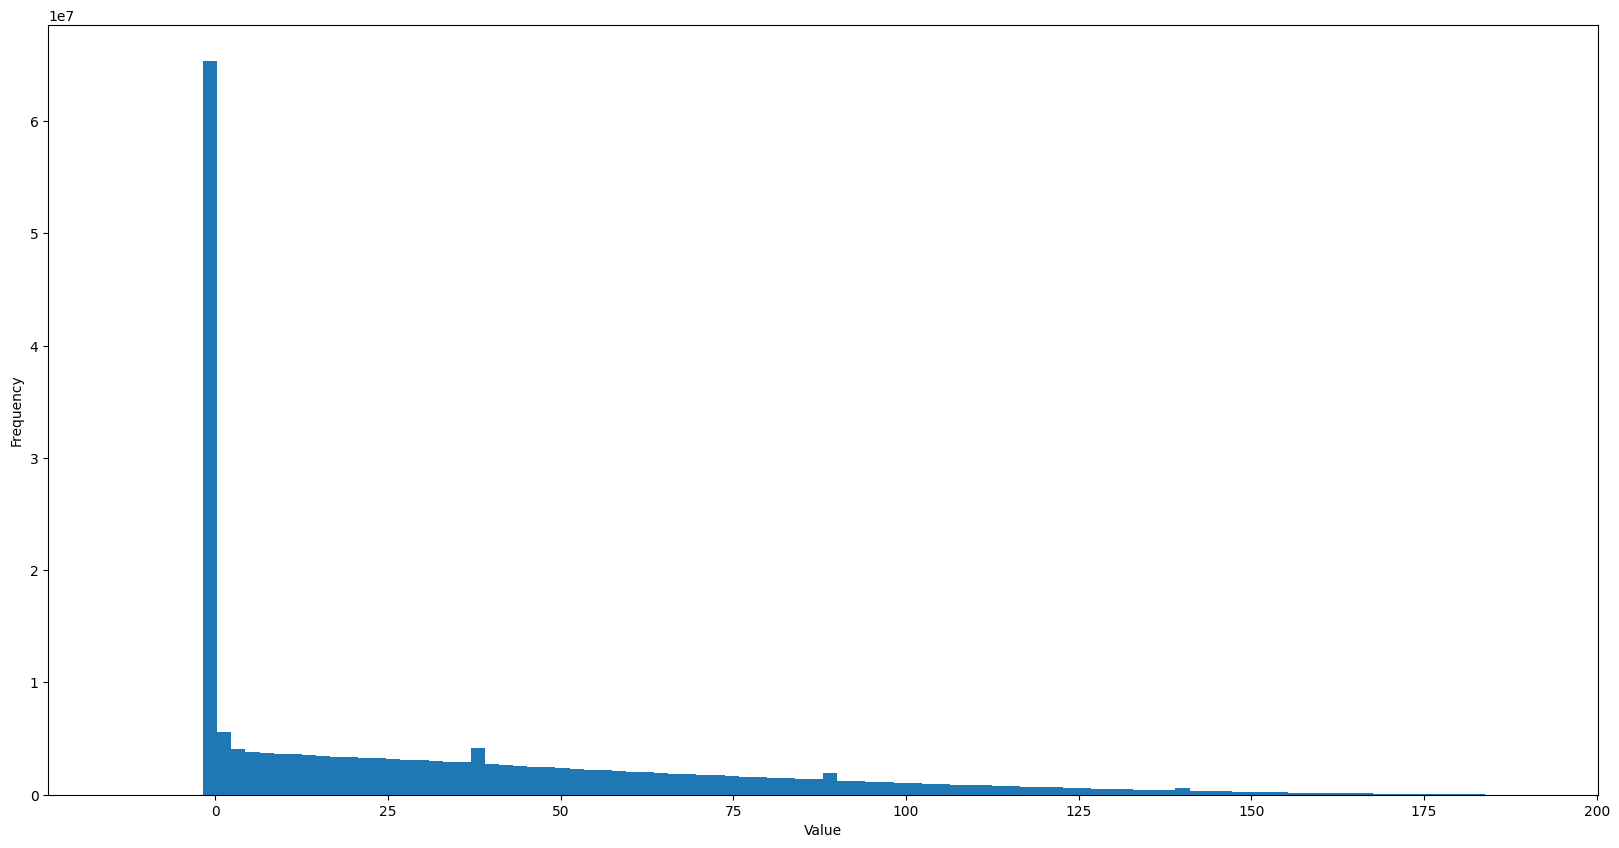

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(votes_months_difference_seq, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [16]:
months_difference_counts = months_difference_seq.value_counts(normalize=True) * 100
print(months_difference_counts.head(10))

-0.0     31.868489
 1.0      1.590028
 2.0      1.144887
 4.0      1.003856
 3.0      0.978432
 6.0      0.962302
 8.0      0.926534
 10.0     0.920690
 5.0      0.913960
 12.0     0.903898
Name: proportion, dtype: float64


### Discover comments duration

In [20]:
comments_file_path = get_file_path("comments.csv")
comments_df = pd.read_csv(comments_file_path)

In [23]:
comments_df['CreationDate'] = pd.to_datetime(comments_df['CreationDate'])
comments_creation_df = comments_df[['PostId', 'CreationDate']].copy()

In [24]:
posts_comments_df = pd.merge(posts_creation_df, comments_creation_df, left_on='Id', right_on='PostId', suffixes=('_post', '_comment'))
comments_months_difference_seq = ((posts_comments_df['CreationDate_comment'] - posts_comments_df['CreationDate_post']).dt.days / 30).round()

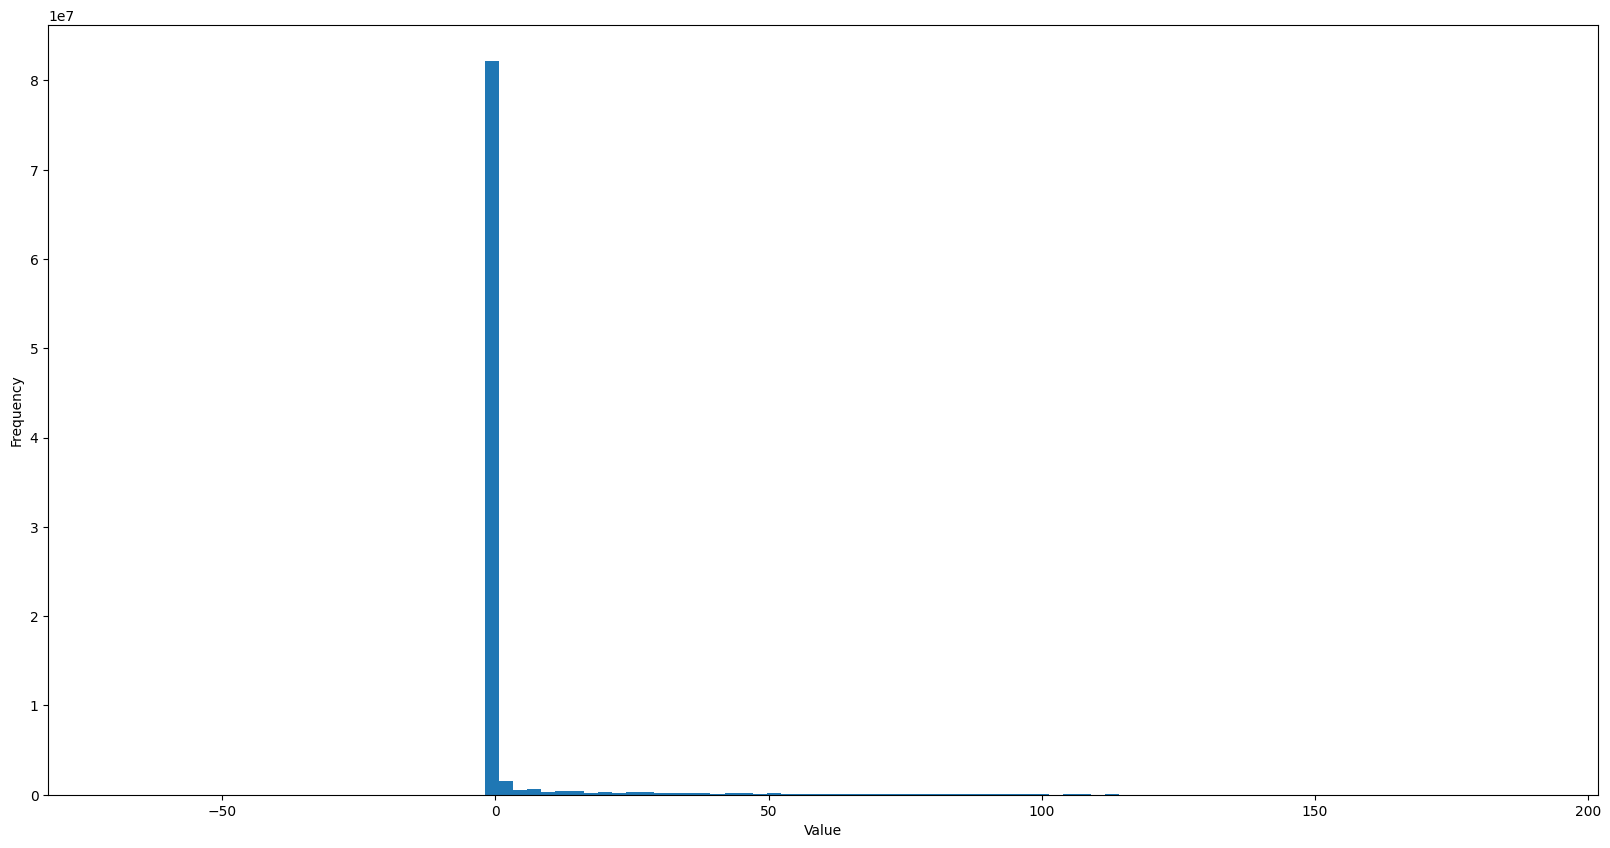

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(comments_months_difference_seq, bins=100)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [26]:
comments_months_difference_counts = comments_months_difference_seq.value_counts(normalize=True) * 100
print(comments_months_difference_counts.head(10))

0.0     90.935936
1.0      0.911582
2.0      0.438805
3.0      0.318881
4.0      0.291622
5.0      0.244062
6.0      0.240956
8.0      0.210341
7.0      0.209174
10.0     0.192652
Name: proportion, dtype: float64
